In [63]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF

In [2]:
def read_basic(f_name):    
    with open(f_name) as f:
        data = np.array([line.split(' ') for line in f], dtype=np.float)
    return data

In [11]:
data = read_basic('Auction/basic-train.txt')
data_test = read_basic('Auction/basic-test.txt')

display(pandas.DataFrame(data.T).describe())
display(pandas.DataFrame(data_test.T).describe())

grand_min = min(np.min(data), np.min(data_test))
data_test -= grand_min
data -= grand_min

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1299.659791,1524.490709,1660.216757,1981.815770,1502.209028,1810.071485,1849.256090,1599.722997,1658.951375,1668.777307,...,1611.352637,1629.414642,1354.760839,1802.386121,1736.752438,1511.317364,1577.893544,1781.366365,1761.569417,1580.546303
std,500.550216,516.488437,516.816759,516.434004,513.470726,529.299736,521.970739,501.555931,511.892615,509.567002,...,506.033924,520.085985,502.983805,522.751373,508.832794,496.734357,498.720397,511.026077,518.884555,509.131892
min,-371.029000,-224.181000,0.977000,257.415000,-450.300000,-159.185000,98.400000,-71.921000,116.894000,68.245000,...,13.572000,-53.682000,-153.505000,139.595000,-3.880000,-496.138000,-305.319000,256.095000,-327.993000,-199.891000
25%,945.012250,1179.747750,1321.817500,1634.874250,1149.011750,1453.904750,1483.869750,1260.349500,1305.001750,1314.999000,...,1267.032250,1270.186500,1012.665000,1452.629750,1386.865250,1176.398250,1240.620750,1429.107000,1415.726500,1247.259500
50%,1299.863500,1522.358000,1666.762000,1989.833500,1516.698000,1812.226000,1858.518000,1588.359500,1676.944000,1671.281500,...,1616.107500,1629.810500,1349.440000,1803.142500,1728.928500,1516.601000,1579.025500,1784.649000,1779.869000,1575.272000
75%,1636.461000,1862.696250,2015.642500,2338.267000,1857.742000,2165.919500,2191.768000,1935.652250,2003.778500,2028.446750,...,1947.506750,1975.045750,1698.650000,2158.957000,2077.570500,1856.970500,1921.473000,2134.838500,2109.474000,1926.394500
max,2919.737000,3379.374000,3350.620000,3740.305000,3152.117000,3609.191000,3474.815000,3383.500000,3452.854000,3383.809000,...,3391.161000,3338.553000,2990.287000,3411.365000,3281.040000,3180.138000,3415.789000,3454.393000,3375.029000,3349.649000


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1338.865355,1515.304765,1637.144101,1979.960488,1471.892198,1781.783957,1817.759391,1567.823049,1636.523537,1642.955667,...,1593.842169,1629.508406,1322.626433,1768.891236,1748.670241,1534.490959,1588.534615,1809.043763,1736.921575,1582.397838
std,498.992481,505.094841,521.056198,517.432272,512.432005,506.247229,498.930283,491.314789,511.370310,515.288539,...,523.094644,506.218213,506.408059,504.789822,524.844355,516.859071,499.195909,515.383645,514.132139,511.040019
min,-480.320000,-4.102000,-175.158000,381.559000,-210.919000,119.127000,-119.772000,-13.239000,118.749000,104.542000,...,-332.764000,38.953000,-294.875000,324.091000,-216.041000,-456.290000,29.526000,53.894000,-153.701000,141.619000
25%,1013.774000,1169.472000,1286.823500,1639.499500,1113.117500,1418.623500,1476.695000,1262.922000,1301.356500,1284.727500,...,1253.180500,1292.524000,993.489000,1429.519500,1399.376000,1194.482500,1238.026000,1486.199000,1400.400000,1236.327000
50%,1332.250000,1516.816000,1650.353000,1988.127000,1455.511000,1772.937000,1813.583000,1569.434000,1649.575000,1643.718000,...,1593.560000,1640.136000,1330.126000,1773.913000,1735.676000,1523.765000,1579.250000,1801.630000,1750.184000,1581.696000
75%,1673.397500,1874.283000,2002.470500,2311.334000,1837.929000,2137.568500,2159.404500,1884.991000,1976.570500,1996.164500,...,1949.634000,1943.699000,1650.791500,2126.230000,2088.573000,1883.766500,1911.751000,2178.381500,2067.128500,1926.753000
max,3058.517000,3183.109000,3277.688000,3677.607000,3044.321000,3405.586000,3306.215000,3316.292000,3306.456000,3137.655000,...,3307.293000,3268.570000,2997.400000,3410.019000,3286.754000,3253.030000,3492.875000,3495.578000,3657.993000,3020.686000


In [48]:
n_components = 128
model = NMF(n_components=n_components)
user_features = model.fit_transform(data)
item_features = model.components_
display(user_features.shape)
display(item_features.shape)

(500, 128)

(128, 2000)

array([ 29.,  21.,  44.,  19.,  54., 107.,  48.,  23.,  42.,  20.,  36.,
        57.])

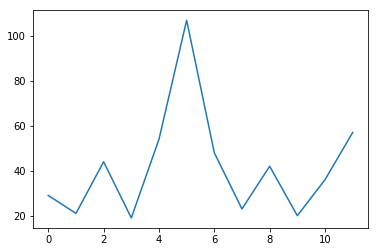

In [207]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=12).fit(user_features)
prob = gmm.predict_proba(user_features)
# display(prob)
display(prob.sum(0))
plt.plot(prob.sum(0))

In [237]:
k = -1
proposal = data.mean(1).argsort()[::-1][:k]
ans = np.argmax(data_test, axis=0)
recall_k = np.array([a in proposal for a in ans]).mean()
random_recall = k/len(data_test)
print(f"Recall@{k}:\t\t{100*recall_k:.6f}%\n"
      f"Random baseline:\t{100*random_recall:.6f}%\n"
      f"Relative Improvement:\t{(recall_k-random_recall)/random_recall:.4f}x")

Recall@-1:		100.000000%
Random baseline:	-0.200000%
Relative Improvement:	-501.0000x
